# Contrast Stretching

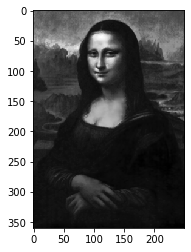

In [1]:
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mona = np.array(Image.open('mona_lisa.png'))
implt = plt.imshow(mona, cmap='gray')

In [2]:
u = mona.astype(float)
u.shape

(360, 250)

In [3]:
u2 = u.ravel()
u2.shape

(90000,)

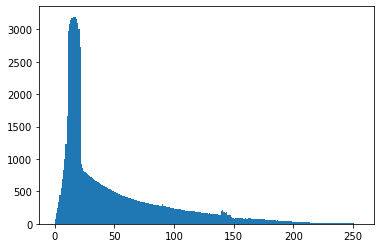

In [4]:
hist = plt.hist(u2, bins=256)

In [5]:
X, Y, Z = np.split(u, 3)

In [6]:
X[:] = 0
Y[:] = 127
Z[:] = 255

In [7]:
test = np.concatenate((X,Y,Z))

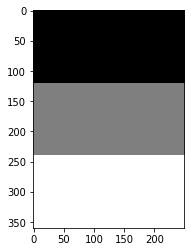

In [8]:
plt.imshow(test, cmap='gray')

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0).fit(test)
test2 = kmeans.cluster_centers_

c:\users\cspoe\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)


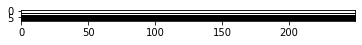

In [10]:
plt.imshow(test2, cmap='gray')

# Noise Removal 

In [40]:
def noiseRemoval(image, avg_type, n_iter):
    
    #read in image
    lizard = np.array(Image.open(image))
    
    #convert image to double
    p = lizard.astype(float)
    
    #get shape of image 
    m, n = lizard.shape
    
    p2 = p
    
    #og count 
    count = n_iter
    
    #denoise the image by replacing each pixel with 
    #the average value of its 3x3 neighbors
    for i in range(2, m-1):
        for j in range(2, n-1):
            p2[i,j] = avg_type((p[i+1, j-1], p[i+1, j], p[i+1, j+1],
                           p[i, j-1], p[i, j], p[i, j+1], p[i-1, j-1],
                           p[i-1, j], p[i-1, j+1]))

    #convert back to uint8
    g = p2.astype(np.uint8)
    
    #plot images
    atype = 'mean' if avg_type == np.mean else 'median' 
    fig, ax = plt.subplots(1, 2, figsize=(20,20))
    ax[0].imshow(g, cmap='gray')
    ax[0].set_title('Noise removal using {} for {} iteration(s)'.format(atype, count), fontsize=18)
    ax[1].imshow(lizard, cmap='gray') 
    ax[1].set_title('Original Image', fontsize=18)
    plt.show()
        
    return 

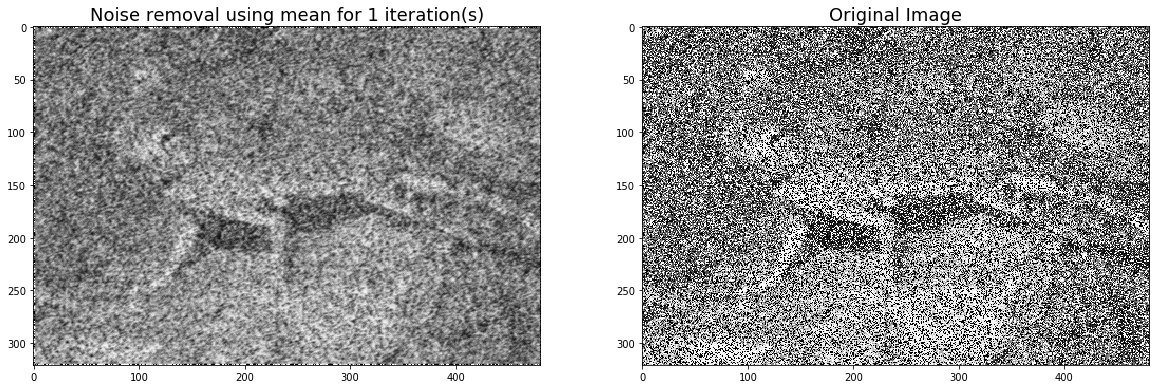

In [41]:
noiseRemoval('lizard_noisy.png', np.mean, 1)

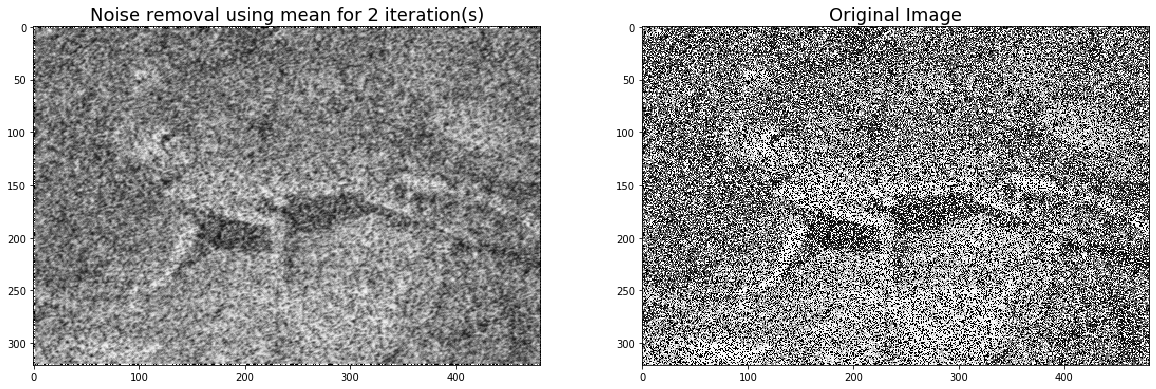

In [42]:
noiseRemoval('lizard_noisy.png', np.mean, 2)

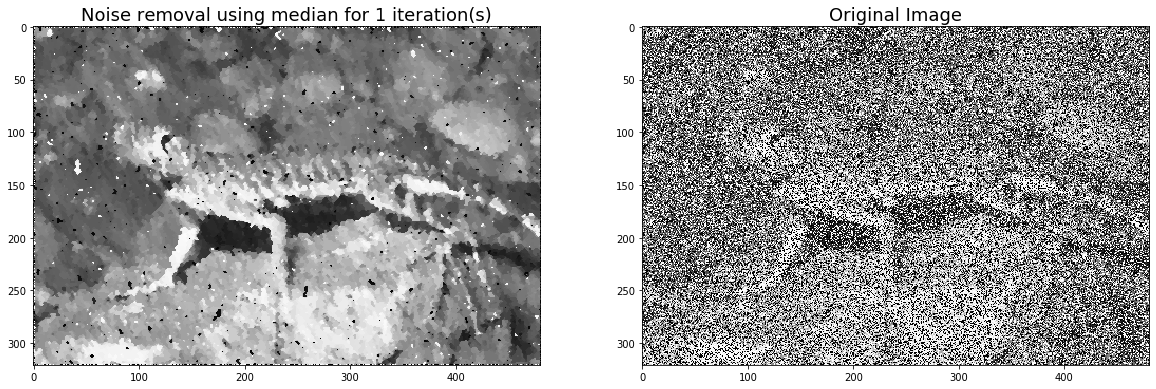

In [43]:
noiseRemoval('lizard_noisy.png', np.median, 1)

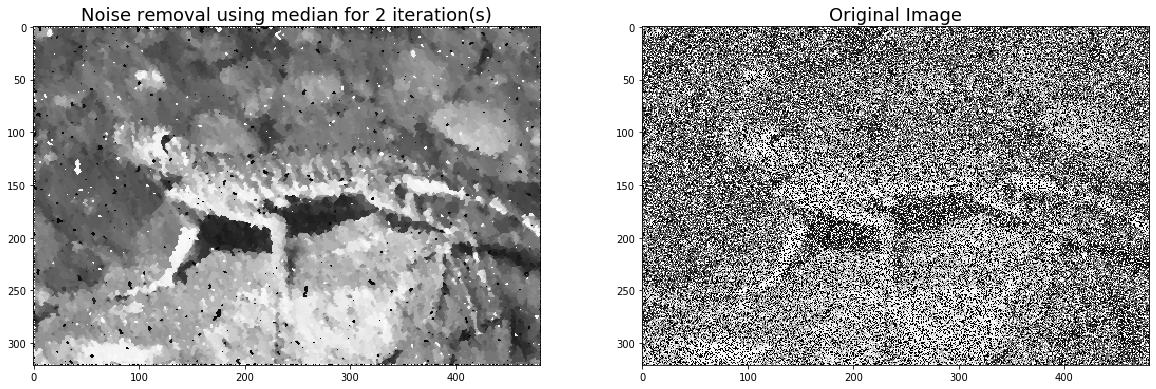

In [46]:
noiseRemoval('lizard_noisy.png', np.median, 2)

# Edge Detection

In [78]:
def edgeDetection (img, threshold):
    
    #read in image
    a = np.array(Image.open(img))
    
    #get the dimensions of the image 
    m, n = a.shape
    
    #convert to a float 
    b = a.astype(float)
    
    #edge matrix 
    e = np.zeros((m, n))
    e[2:m-1, 2:n-1] = (abs(b[3:m, 2:n-1] - b[1:m-2, 2:n-1]) +
                       abs(b[2:m-1, 3:n] - b[2:m-1, 1:n-2]))
    
    #scale E to [0, 255]
    emin = np.min(np.min(e))
    emax = np.max(np.max(e))
    
    #plot it 
    e = np.round(255 * (e - emin) / (emax - emin))
    
    #using a threshold 
    e_thresh = 255 * (threshold < e)
    
    #reverse image 
    e_reverse = 255 - e_thresh
    
    fig, ax = plt.subplots(1, 3, figsize=(35,17))
    ax[0].imshow(e.astype(np.uint8), cmap='gray')
    ax[0].set_title('All the E data', fontsize=22)
    ax[1].imshow(e_thresh.astype(np.uint8), cmap='gray') 
    ax[1].set_title('E data above the threshold where threshold is {}'.format(threshold), fontsize=22)
    ax[2].imshow(e_reverse.astype(np.uint8), cmap='gray') 
    ax[2].set_title('E data above the threshold (reverse image) where threshold is {}'.format(threshold), fontsize=22)
    plt.show()
    
    return 

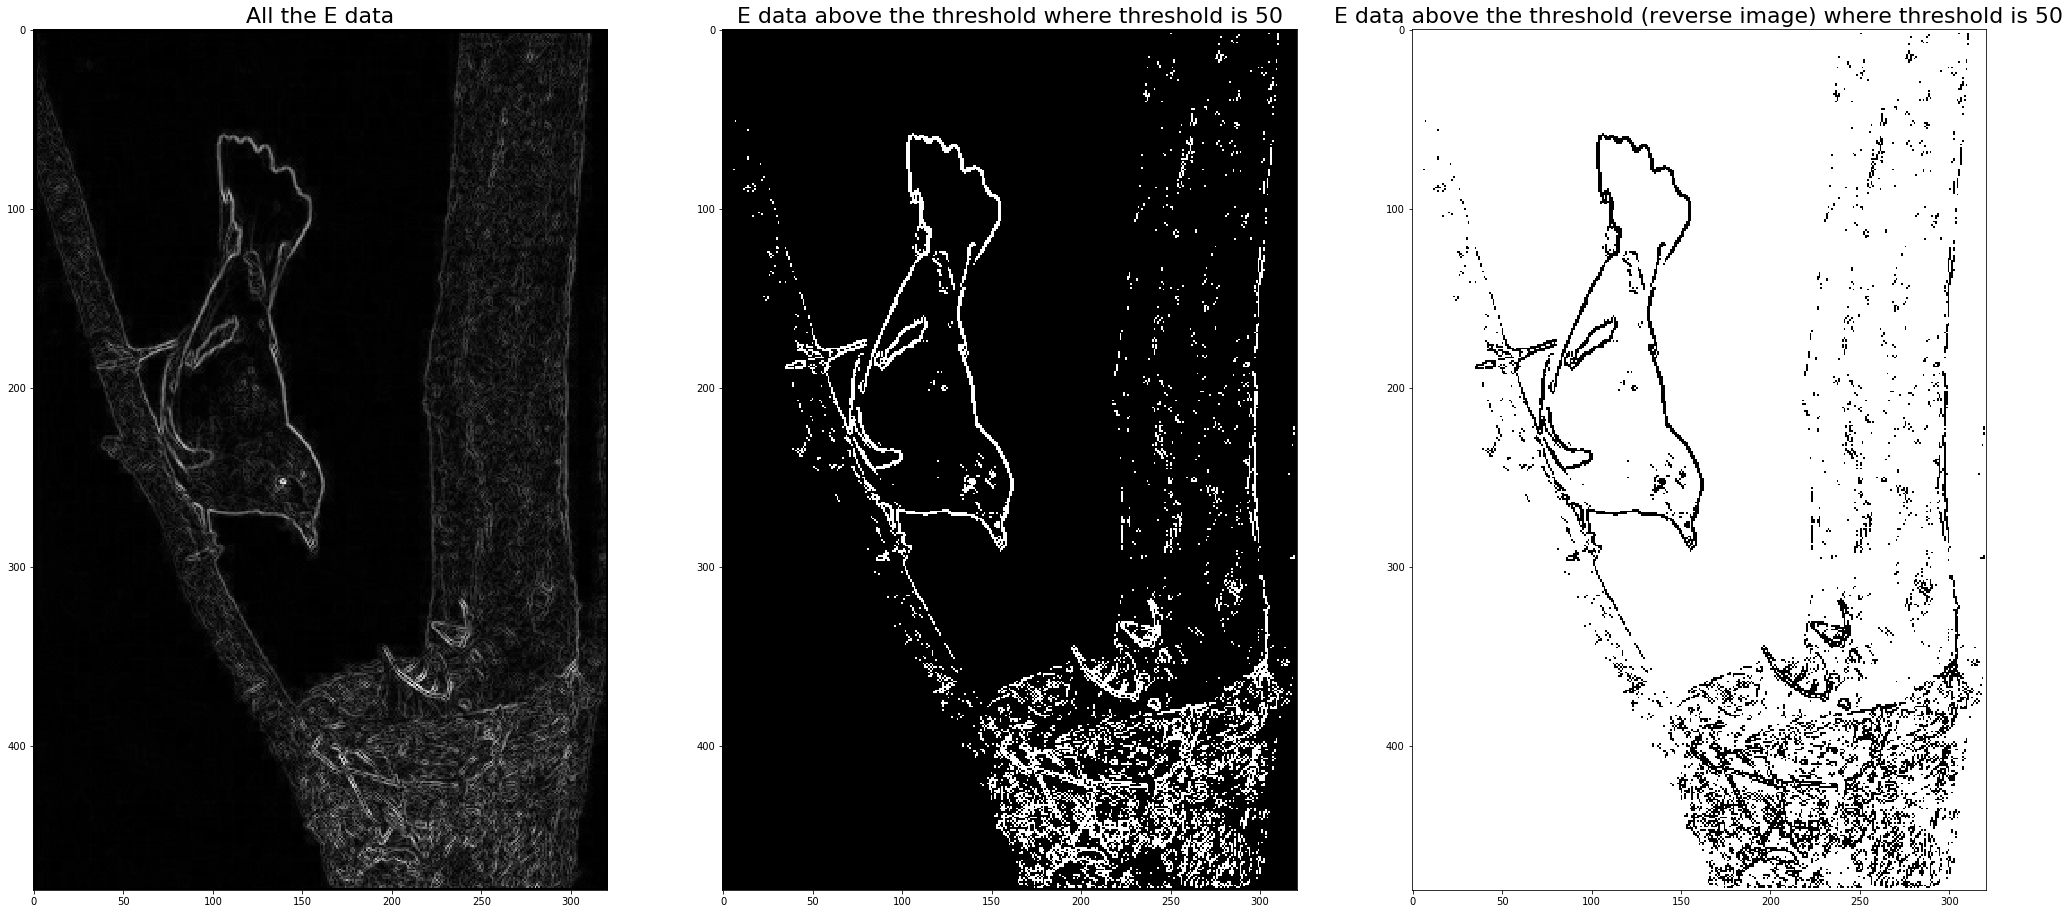

In [79]:
edgeDetection('bird.png', 50)

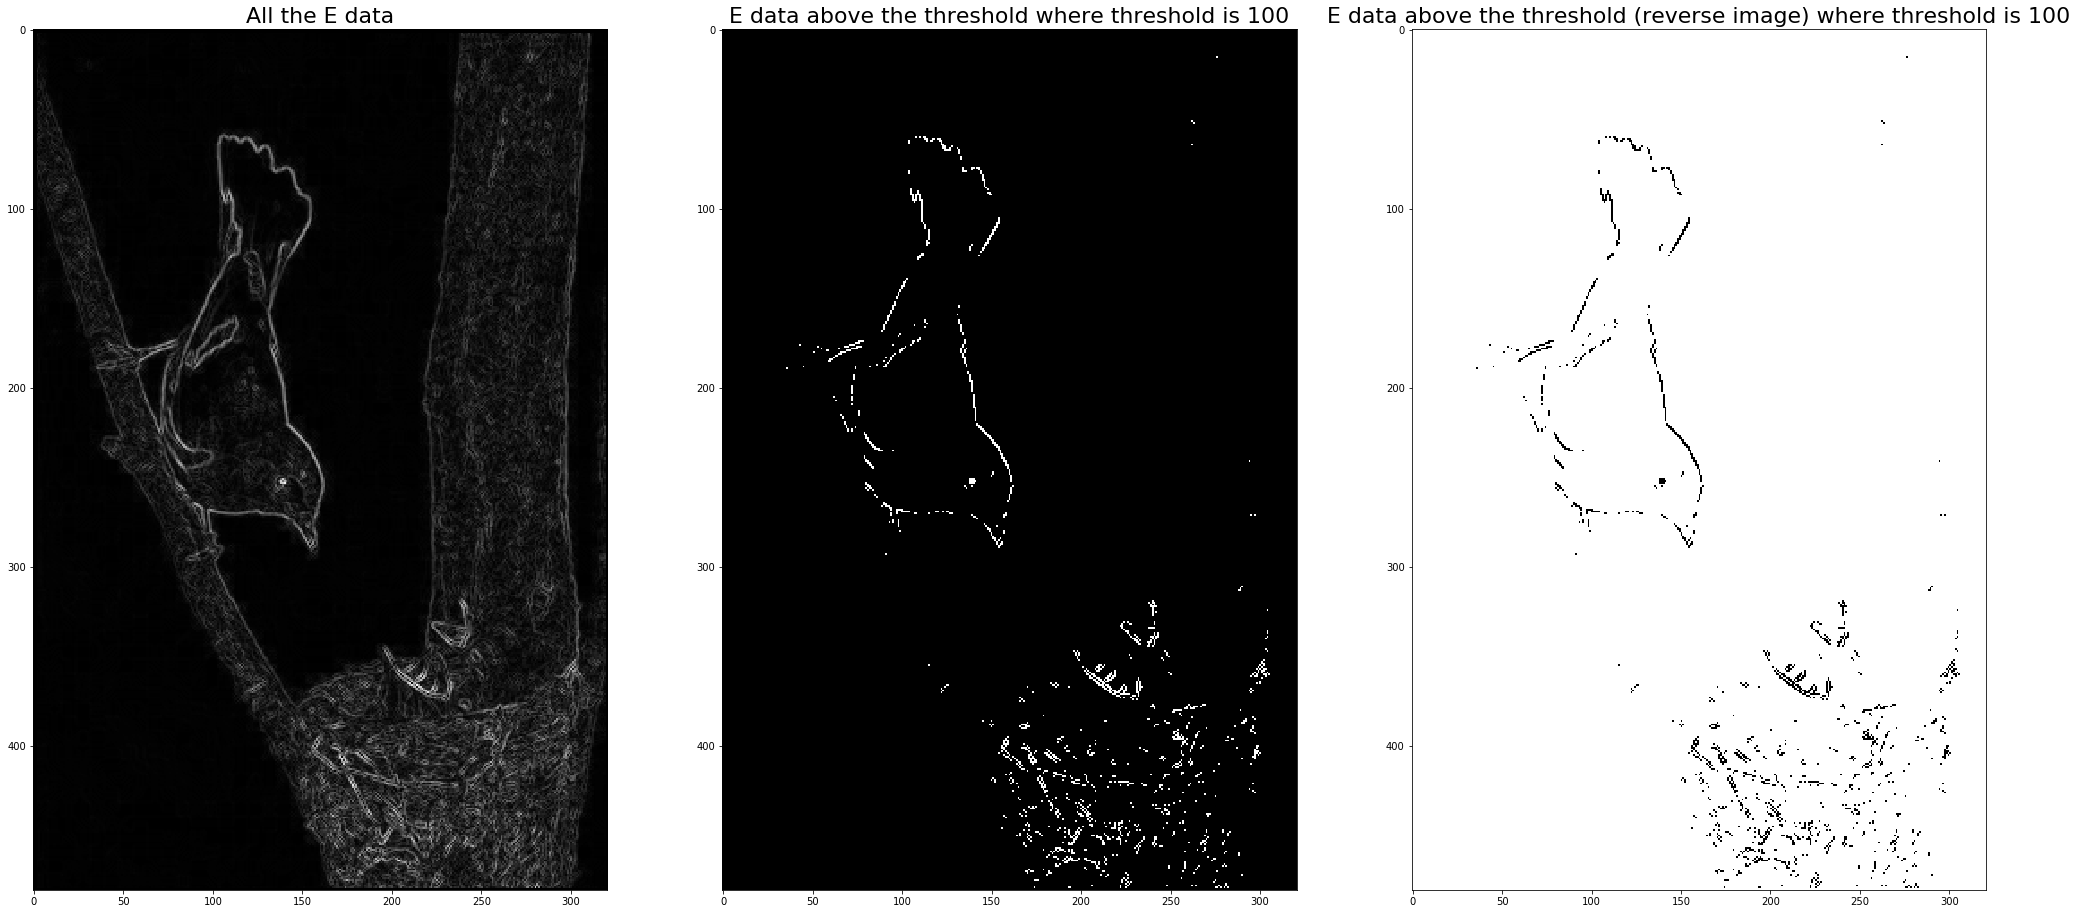

In [80]:
edgeDetection('bird.png', 100)

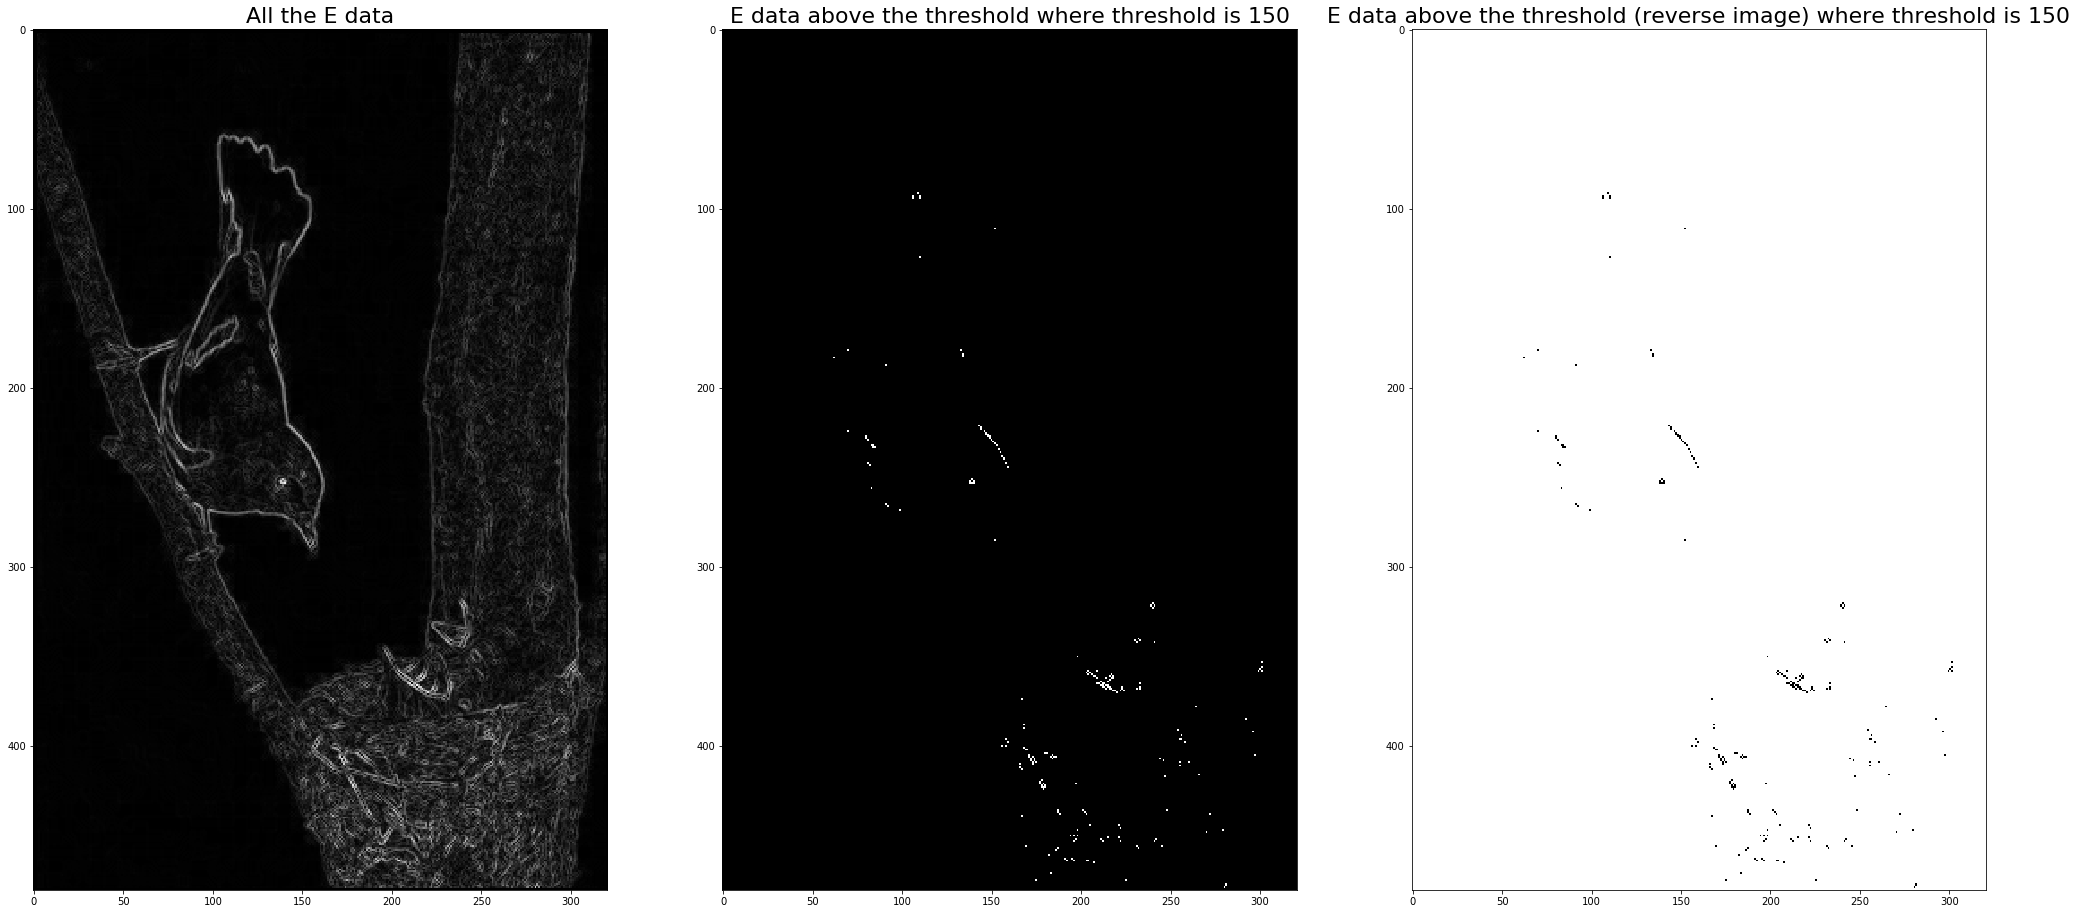

In [81]:
edgeDetection('bird.png', 150)

# Component Identification

In [97]:
def componentIdentification (img, threshold):
    
    #read in image
    a = np.array(Image.open(img))
    
    #get the dimensions of the image 
    m, n = a.shape
    
    #convert to a float 
    b = a.astype(float)
    
    #edge matrix 
    e = np.zeros((m, n))
    e[2:m-1, 2:n-1] = (abs(b[3:m, 2:n-1] - b[1:m-2, 2:n-1]) +
                       abs(b[2:m-1, 3:n] - b[2:m-1, 1:n-2]))
    
    #scale E to [0, 255]
    emin = np.min(np.min(e))
    emax = np.max(np.max(e))
    
    #plot it 
    e = np.round(255 * (e - emin) / (emax - emin))
    
    #using a threshold 
    e_thresh = 255 * (threshold < e)
    
    #show plots 
    fig, ax = plt.subplots(1, 2, figsize=(20,20))
    ax[0].imshow(a, cmap='gray')
    ax[0].set_title('Original Image', fontsize=18)
    ax[1].imshow(e_thresh.astype(np.uint8), cmap='gray') 
    ax[1].set_title('E data above the threshold where threshold is {}'.format(threshold), fontsize=18)
    plt.show()

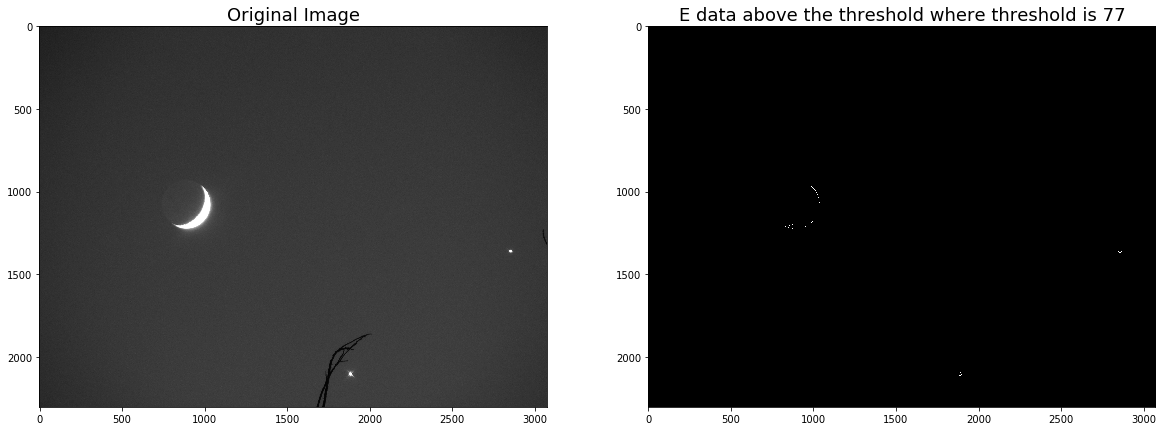

In [98]:
#show threshold image so that, in the image, everything is black 
#except for the two stars and the moon
componentIdentification('conjunction_gray.png',77)

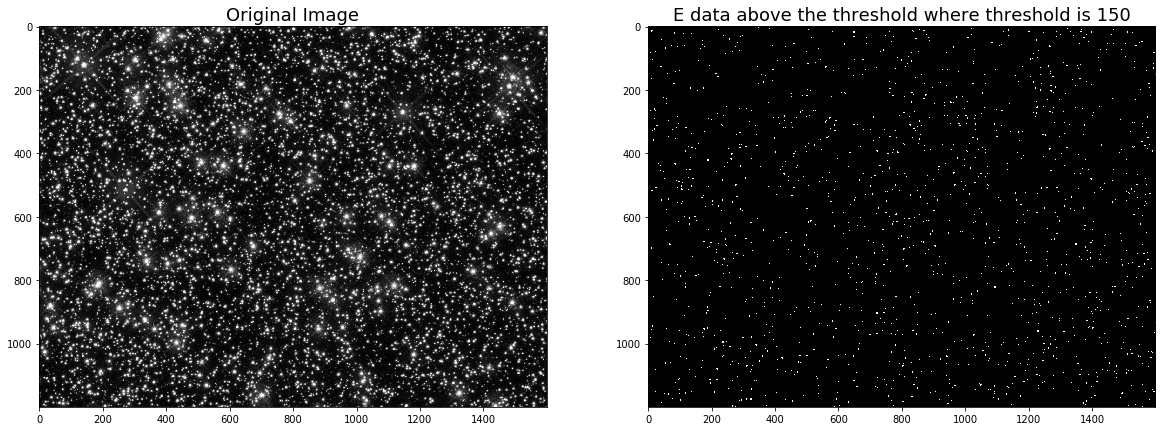

In [102]:
#determine a threshold so that the threshold image separates 
#white blob of stars 
componentIdentification('star_field_gray.png', 150)